In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('smoking_health_data_final.csv')

In [4]:
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


Text(0.5, 0, 'Age')

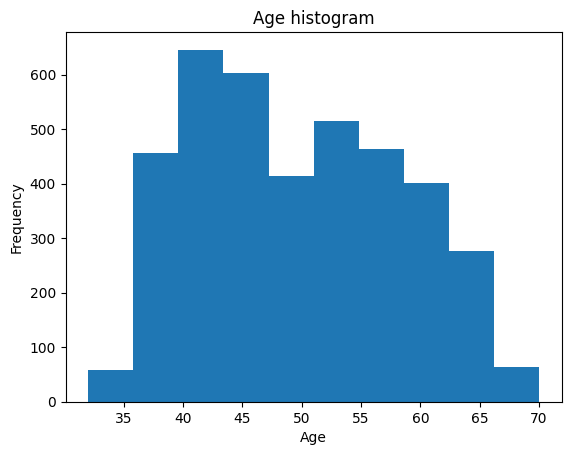

In [6]:
df.age.plot(kind='hist', title='Age histogram')
plt.xlabel('Age')

From the histogram above we can see that the age recorded in this dataset was between 30 and 70

In [7]:
df.sex.value_counts()

sex
female    2081
male      1819
Name: count, dtype: int64

<Axes: title={'center': 'Gender Distribution: Examining Male and Female counts'}, xlabel='sex'>

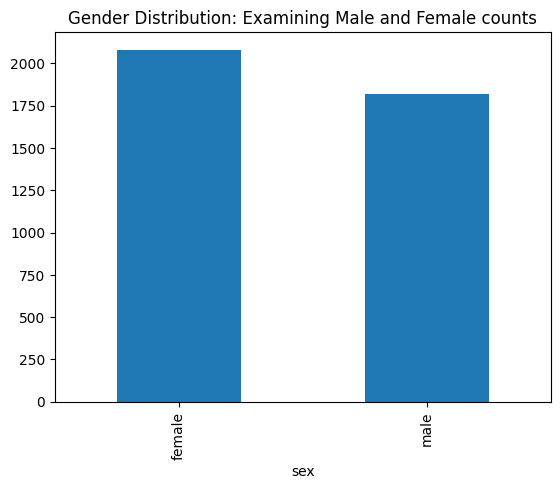

In [8]:
df['sex'].value_counts().plot(kind='bar', title='Gender Distribution: Examining Male and Female counts')

In [9]:
df

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60.0,254.0
3896,49,male,yes,70,123/75,60.0,213.0
3897,56,male,yes,70,125/79,60.0,246.0
3898,50,male,yes,85,134/95,60.0,340.0


Now we want to see the effects of smoking on heart rate

A normal resting heart rate for adults ranges from 60 to 100 beats per minute.  Generally, a lower heart rate at rest implies more efficient heart function and better cardiovascular fitness

In [10]:
df.groupby('current_smoker')['heart_rate'].mean()

current_smoker
no     75.007622
yes    76.383023
Name: heart_rate, dtype: float64

On average, smokers have a higher heart rate as compared to non smokers.<br>
Let's see other factors which might contribute to a higher heart rate

In [11]:
df['age']

0       54
1       45
2       58
3       42
4       42
        ..
3895    37
3896    49
3897    56
3898    50
3899    40
Name: age, Length: 3900, dtype: int64

In [12]:
df['age_bin'] = pd.cut(df['age'], bins=3, labels=['adult', 'old', 'older'])

In [13]:
df.groupby('age_bin', observed=True)['heart_rate'].mean()

age_bin
adult    75.656274
old      75.908257
older    75.285375
Name: heart_rate, dtype: float64

Age doesn't really have an impact on the heart rate

In [14]:
df.groupby('sex')['heart_rate'].mean()

sex
female    76.940413
male      74.257284
Name: heart_rate, dtype: float64

On average males have a lesser heart rate as compared to females

In [15]:
df.groupby(['sex', 'current_smoker'], observed=True)['heart_rate'].mean().unstack()

current_smoker,no,yes
sex,,
female,76.581340,77.484885
male,72.243697,75.558371


Males who smoke have a significantly higher heart rate as compared to males who don't smoke.<br>
Females who smoke however, have a slightly higher heart rate compared to females who don't smoke.<br>
Females heart rates whether they smoke or not are higher than all male (those who smoke or dont).

In [16]:
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,age_bin
0,54,male,yes,95,110/72,NaN,219.0,old
1,45,male,yes,64,121/72,NaN,248.0,old
2,58,male,yes,81,127.5/76,NaN,235.0,older
3,42,male,yes,90,122.5/80,NaN,225.0,adult
4,42,male,yes,62,119/80,NaN,226.0,adult


In [17]:
df['cigs_per_day'].isnull().sum()

14

We have 14 missing rows on the cigs_per_day column

In [18]:
df.groupby(['current_smoker', 'sex'])['cigs_per_day'].mean()

current_smoker  sex   
no              female     0.000000
                male       0.000000
yes             female    13.909311
                male      22.113657
Name: cigs_per_day, dtype: float64

We will now fill in missing values of the cigs_per_day column using the average of the cigs_per_day_column depending on the current_smoker status and sex 

In [19]:
def apply_cigs_per_day_missing_value(dataframe):
    if dataframe.cigs_per_day > 0:
        return dataframe.cigs_per_day
    else:
        if dataframe.current_smoker == 'no':
            return 0
        elif dataframe.current_smoker == 'yes' and dataframe.sex == 'male':
            return df.groupby(['current_smoker', 'sex'])['cigs_per_day'].mean()['yes']['male']
        elif dataframe.current_smoker == 'yes' and dataframe.sex == 'female':
            return df.groupby(['current_smoker', 'sex'])['cigs_per_day'].mean()['yes']['female']
        

In [20]:
df['cigs_per_day'] = df.apply(apply_cigs_per_day_missing_value, axis=1)

In [21]:
df.isnull().sum()

age               0
sex               0
current_smoker    0
heart_rate        0
blood_pressure    0
cigs_per_day      0
chol              7
age_bin           0
dtype: int64

Now we want to fill in the missing values of cholesterol

In [22]:
df

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,age_bin
0,54,male,yes,95,110/72,22.113657,219.0,old
1,45,male,yes,64,121/72,22.113657,248.0,old
2,58,male,yes,81,127.5/76,22.113657,235.0,older
3,42,male,yes,90,122.5/80,22.113657,225.0,adult
4,42,male,yes,62,119/80,22.113657,226.0,adult
...,...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60.000000,254.0,adult
3896,49,male,yes,70,123/75,60.000000,213.0,old
3897,56,male,yes,70,125/79,60.000000,246.0,old
3898,50,male,yes,85,134/95,60.000000,340.0,old


In [23]:
df[df['chol'].isna()]

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,age_bin
424,47,male,no,75,142/96,0.0,NaN,old
1013,65,male,no,65,152.5/97.5,0.0,NaN,older
1608,58,male,no,70,116.5/71,0.0,NaN,older
2104,45,male,yes,72,126/85,3.0,NaN,old
3175,51,male,yes,70,112.5/74,20.0,NaN,old
3613,50,male,yes,72,152.5/105,30.0,NaN,old
3705,43,male,yes,77,152/87,30.0,NaN,adult


In [24]:
df.groupby(['current_smoker', 'sex'])['chol'].mean()

current_smoker  sex   
no              female    243.143541
                male      230.713080
yes             female    234.299879
                male      234.662125
Name: chol, dtype: float64

Cholesterol is a waxy substance found in your blood.  Your body needs cholestorol to build healthy cells, but high levels of cholesterol can increase your risk of heart disease

On average, males who don't smoke have a lower cholestorol compared to those who smoke<br>
However females who do not smoke have surprisingly high cholestorol rates

In [25]:
df['chol'] = df['chol'].fillna(df['chol'].mean())

In [26]:
df.isnull().sum()

age               0
sex               0
current_smoker    0
heart_rate        0
blood_pressure    0
cigs_per_day      0
chol              0
age_bin           0
dtype: int64

<Axes: title={'center': 'Non smokers heart rate'}, ylabel='Frequency'>

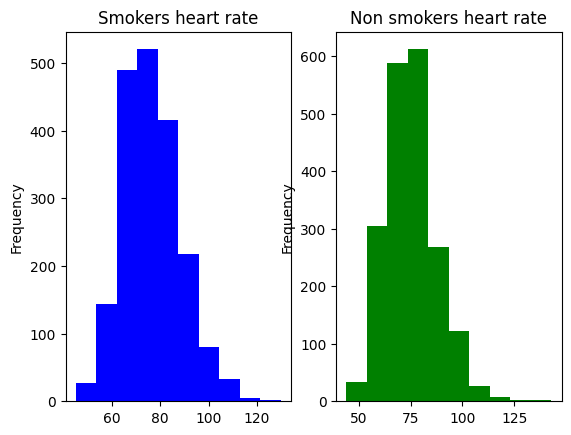

In [29]:
fig, axes = plt.subplots(1, 2)
df.query('current_smoker=="yes"')['heart_rate'].plot(kind='hist', ax=axes[0],color='blue', title='Smokers heart rate')
df.query('current_smoker=="no"')['heart_rate'].plot(kind='hist', ax=axes[1], color='green', title='Non smokers heart rate')

There isn't a huge difference in heart rate between smokers and non smokers